# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nandito Yuda Samosir
- **Email:** nanditoxamosir@gmail.com
- **ID Dicoding:** nanditosamosir

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Bagaimana pengaruh perubahan musim dan cuaca terhadap penyewaan sepeda?
- Pada bulan apa tingkat penyewaan sepeda tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Membuat Tabel Day

In [2]:
day_df = pd.read_csv("bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membuat Tabel Hour

In [3]:
hour_df = pd.read_csv("bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang memiliki duplikasi pada file ini.

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat anomali data. Satu satunya kesalahan pada file `day.csv` adalah terdapat pada tipe data kolom `dteday`, yang seharusnya adalah bertipe **datetime** bukan **object**

##### Menilai Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang memiliki duplikasi pada file ini.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat anomali data. Satu satunya kesalahan pada file `hour.csv` adalah terdapat pada tipe data kolom `dteday`, yang seharusnya adalah bertipe **datetime** bukan **object**

### Cleaning Data

##### Membersihkan data day_df

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Pertama, kita perlu mengubah tipe data dari kolom `dteday` menjadi **datetime** dengan cara berikut:

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data untuk kolom `dteday` telah diubah menjadi **datetime**

##### Membersihkan Data hour_df

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Kemudian, kita juga mengubah tipe data dari kolom `dteday` menjadi **datetime** dengan cara berikut:

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data untuk kolom `dteday` telah diubah menjadi **datetime**

## Exploratory Data Analysis (EDA)

### Melakukan Eksplorasi Data

##### Eksplorasi Data day_df

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Kita bisa melihat jumlah penyewa sepeda setiap bulannya pada tahun 2011 dan tahun 2012 dengan cara berikut:

In [17]:
day_df.groupby(by=["yr","mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr mnth                            
0  1       3073       35116   38189
   2       6242       41973   48215
   3      12826       51219   64045
   4      22346       72524   94870
   5      31050      104771  135821
   6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   9      26545      100873  127418
   10     25222       98289  123511
   11     15594       86573  102167
   12      8448       78875   87323
1  1       8969       87775   96744
   2       8721       94416  103137
   3      31618      133257  164875
   4      38456      135768  174224
   5      44235      151630  195865
   6      43294      159536  202830
   7      41705      161902  203607
   8      43197      171306  214503
   9      43778      174795  218573
   10     34538      164303  198841
   11     21009      131655  152664
   12     13245      110468  123713

Melihat jumlah penyewa sepeda berdasarkan kondisi cuaca 

In [18]:
day_df.groupby(by=["weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Melihat jumlah penyewa sepeda berdasarkan musim

In [19]:
day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Melihat jumlah penyewa sepeda berdasarkan hari kerja

In [20]:
day_df.groupby(by=["holiday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [21]:
day_df.groupby(by=["workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [22]:
day_df.groupby(by=["weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?

C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\3388774427.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count_df = filtered_df.resample(rule='M', on='dteday').agg({


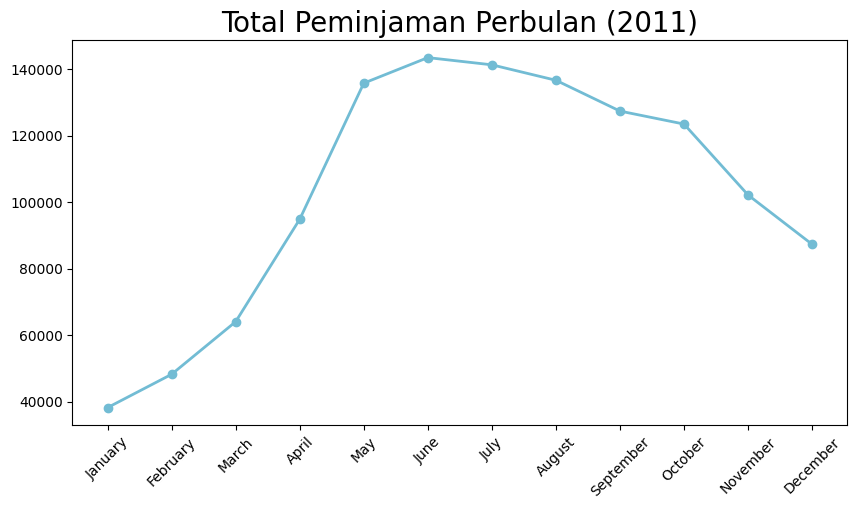

C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\3388774427.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count_df = filtered_df.resample(rule='M', on='dteday').agg({


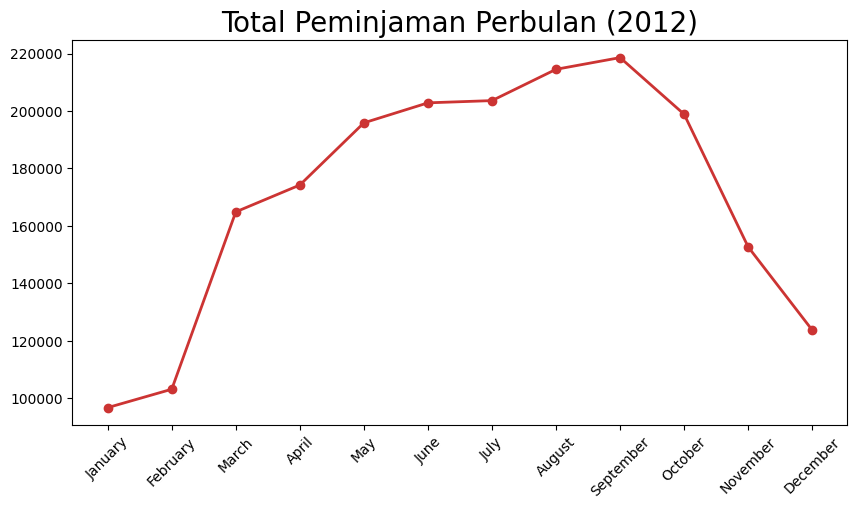

In [23]:
colors = ["#72BCD4", "#CC3433"]

for year in [0, 1]:
    filtered_df = day_df[day_df['yr'] == year]
    monthly_count_df = filtered_df.resample(rule='M', on='dteday').agg({
        "cnt": "sum"
    })
    monthly_count_df.index = monthly_count_df.index.strftime('%B')
    monthly_count_df = monthly_count_df.reset_index()
    monthly_count_df.rename(columns={
        "cnt": "revenue"
    }, inplace=True)
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_count_df["dteday"], monthly_count_df["revenue"], marker='o', linewidth=2, color=colors[year])
    plt.title(f"Total Peminjaman Perbulan ({'2011' if year == 0 else '2012'})", loc="center", fontsize=20)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    

Berdasarkan diagram di atas, kita dapat mengamati bahwa tingkat penyewaan sepeda pada tahun 2011 mengalami peningkatan yang signifikan pada rentang bulan Januari hingga bulan Juni. Kemudian tingkat penyewaan sepeda pada bulan Juli hingga Desember 2011 mengalami penurunan secara berkala sedikit demi sedikit. Kemudian pada tahun 2012, terdapat lonjakan tingkat penyewaan sepeda daripada tahun sebelumnya. Peningkatan terjadi secara signifikan dari bulan Januari hingga bulan September. Kemudian mengalami penurunan kembali beberapa bulan sebelum akhir tahun, yaitu mulai bulan Oktober hingga Desember.

### Pertanyaan 2: Bagaimana pengaruh perubahan musim dan cuaca terhadap penyewaan sepeda?

##### Diagram Jumlah Penyewa Berdasarkan Musim

C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\3757889868.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


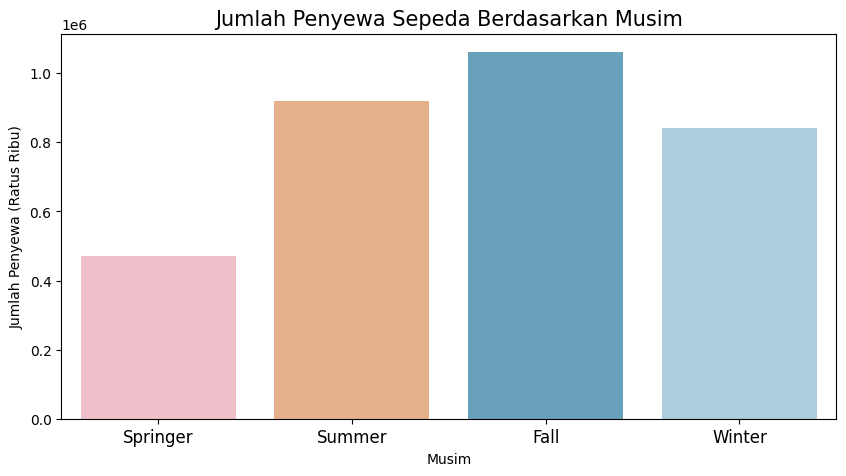

In [24]:
colors2 = ["#f6b8c4", "#f6ad7d", "#5ba5c8", "#a6cfe5"]

season_df = day_df.groupby(by=["season"]).cnt.sum().reset_index()
season_df.rename(columns={
    "cnt": "sum"
}, inplace=True)

season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_df['season'] = season_df['season'].map(season_mapping)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=season_df.sort_values(by="sum", ascending=False),
    palette=colors2,
    order=season_df['season']
)


plt.title("Jumlah Penyewa Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewa (Ratus Ribu)")
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

##### Diagram Jumlah Penyewa Berdasrkan Cuaca

C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\17000173.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\17000173.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


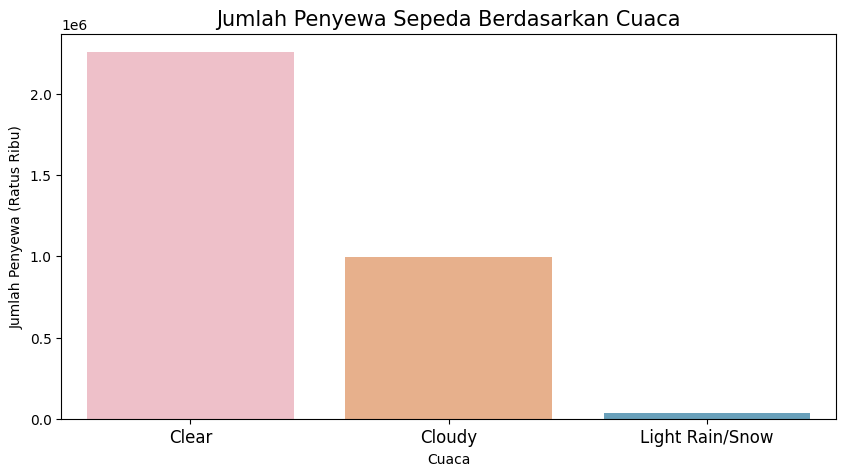

In [25]:
colors2 = ["#f6b8c4", "#f6ad7d", "#5ba5c8", "#a6cfe5"]

weather_df = day_df.groupby(by=["weathersit"]).cnt.sum().reset_index()
weather_df.rename(columns={
    "cnt": "sum"
}, inplace=True)

weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain'}
weather_df['weathersit'] = weather_df['weathersit'].map(weather_mapping)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=weather_df.sort_values(by="sum", ascending=False),
    palette=colors2,
    order=weather_df['weathersit']
)


plt.title("Jumlah Penyewa Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewa (Ratus Ribu)")
plt.xlabel("Cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Kita bisa melihat banyaknya penyewa sepeda berdasarkan keadaan musim dan cuaca. Satu hal yang dapat diamati dari diagram `Cuaca` adalah, tidak ada penyewa sepeda ketika cuaca adalah **Heavy Rain**.

### Pertanyaan 3: Pada bulan apa tingkat penyewaan sepeda tertinggi dan terendah?

C:\Users\nandi\AppData\Local\Temp\ipykernel_21612\53024510.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


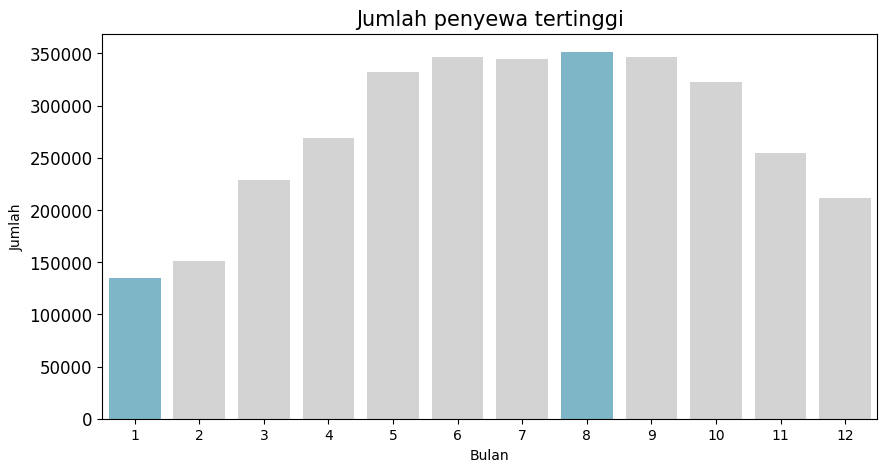

In [26]:
highlow_df = day_df.groupby(by="mnth").cnt.sum().reset_index()
highlow_df.rename(columns={
    "cnt": "sum"
}, inplace=True)
highlow_df
plt.figure(figsize=(10, 5))
max_index = highlow_df['sum'].idxmax()
min_index = highlow_df['sum'].idxmin()
colors3 =["#D3D3D3" if i != max_index and i != min_index else "#72BCD4" for i in range(len(highlow_df))]

sns.barplot(
    x="mnth", 
    y="sum",
    data=highlow_df.sort_values(by="sum", ascending=False),
    palette=colors3
)

plt.title("Jumlah penyewa tertinggi", loc="center", fontsize=15)
plt.ylabel("Jumlah")
plt.xlabel("Bulan")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari diagram di atas kita bisa melihat bahwa penyewa sepeda tertinggi berada pada bulan 8 dan yang paling rendah berada pada bulan 1. Hasil yang didapatkan ini adalah dengan menjumlahkan jumlah penyewa pada bulan yang sama antara tahun 2011 dan 2012, sehingga kita bisa mendapatkan hasil dari keseluruhan data.

## Conclusion

- Conclution pertanyaan 1: Performa penyewaan sepeda dalam beberapa bulan terakhir terlihat relatif turun dan itu adalah hal yang sama terjadi pada tahun sebelumnya (2011). Tren penyewaan sepeda pada beberapa bulan sebelum akhir tahun mengalami penurunan secara bertahap. Penurunan ini juga memiliki hubungan dengan perubahan musim yang dibahas pada pertanyaan berikutnya.

- Conclution pertanyaan 2: Perubahan musim memiliki pengaruh terhadap jumlah penyewaan sepeda yang didapatkan. Dimana pada musim gugur (fall) setiap tahunnya memiliki jumlah penyewa terbanyak dibanding musim yang lainnya. Kemudian apabila kita melihat pengaruh cuaca terhadap jumlah penyewa sepeda, maka kita akan melihat bahwa tingkat penyewa sepeda yang paling tinggi merupakan cuaca yang memiliki index 1 (Clear, Few clouds, Partly cloudy, Partly cloudy). Sedangkan yang terendah merupakan cuaca yang memiliki index 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).

- Conclution pertanyaan 3: Pada diagram yang ditunjukkan, kita dapat melihat bahwa apabila dijumlahkan, jumlah penyewa sepeda yang paling tinggi terdapat pada bulan 8 dan yang memiliki jumlah penyewa paling rendah terdapat pada bulan 1. Jumlah penyewa sepeda ini pun terlihat memiliki pola yang sama dengan diagram yang menunjukkan jumlah penyewa berdasarkan musim pada pertanyaan sebelumnya.